## 2.1 Random Variables and Probability Distributions

### Probability Distributions of Discrete Random Variables

- Outcomes: the mutually exclusive results of a random process.
- Probability: the proportion that the outcome occurs over a large number of experiments.
- Sample space: the set of all possible outcomes of a random variable.
- Event: a subset of the sample space which consists of one or more outcomes.
- Random variable: a numerical summary of random outcomes (can be discrete or continuous).


- A typical example of a discrete random variable is the result of a dice roll, which randomly selects a sample of size 1 from a sample space of {1,2,3,4,5,6}.


- We can simulate a dice roll using the base rand() function.

In [4]:
print(rand(1:6))

5

- Probability distribution: a mathematical function that provides the probabilities of occurrence of different possible outcomes in an experiment.
- Cumulative probability distribution: a mathematical function that provides the probability of a random variable being less than or equal to a particular value.
- Discrete uniform distribution: a probability distribution that places equal probabilities for all equal outcomes.


- A typical example of an experiment with a discrete uniform distribution is a dice roll, as each face has an equal probability of 1/6.


- We can plot the probability distribution and cumulative probability distribution of a dice roll using the plot() function from the Plots package.

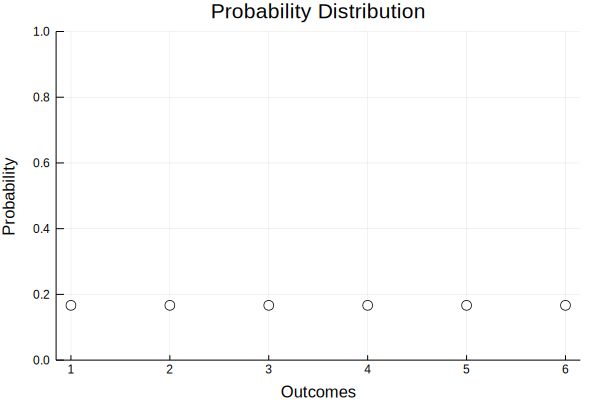

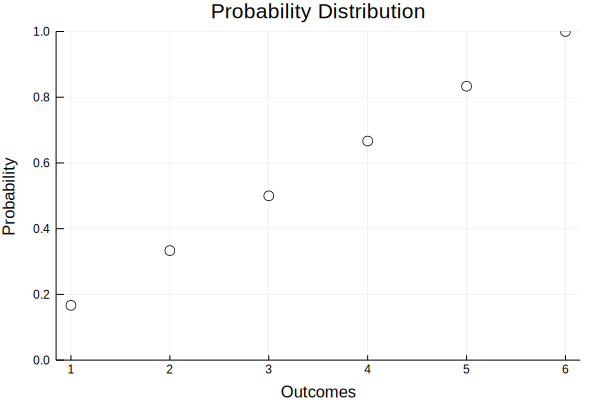

In [22]:
using Plots

faces = 1:6 #set the faces of a dice to be equal to a discrete range from 1 to 6

x = faces #set the x axis to be the faces of a die
y = [1/6 for _ in faces] #set the y axis values to be equal to 1/6 for all the faces on a die

p1 = plot( #assign a plot object to the variable p1 using the following attributes
    x, #x series
    y, #y series
    st = :scatter, #series type
    title = "Probability Distribution", #plot title
    label = [""], #legend labels
    xlabel = "Outcomes", #x axis label
    ylabel = "Probability", #y axis label
    ylims = (0,1), #y axis limits
    yticks = 0:0.1:1, #y axis tick range
    ms = 5, #marker size
    mc = :white #marker color
)

y = [(1/6 * i) for i in faces] #set the y axis values to be equal to 1/6 * die face value

p2 = plot( #assign a plot object to the variable p2 using the following attributes
    x, #x series
    y, #y series
    st = :scatter, #series type
    title = "Probability Distribution", #plot title
    label = [""], #legend labels
    xlabel = "Outcomes", #x axis label
    ylabel = "Probability", #y axis label
    ylims = (0,1), #y axis limits
    yticks = 0:0.1:1, #y axis tick range
    ms = 5, #marker size
    mc = :white #marker color
)

display(p1)
display(p2)

#plotsjl cheatsheet: https://github.com/sswatson/cheatsheets/blob/master/plotsjl-cheatsheet.pdf
#plotsjl docs tutorial: https://docs.juliaplots.org/latest/tutorial/

- We can use the simulation of a dice roll to produce a Monte Carlo estimation of the probability of each die face being rolled.
- This is implemented below using the previously demonstrated functions, as well as the base count() function and the base push!() function.
- As it can be seen from the line plot, as the number of experiments increase, the probability of each die face being rolled converges towards 1/6.



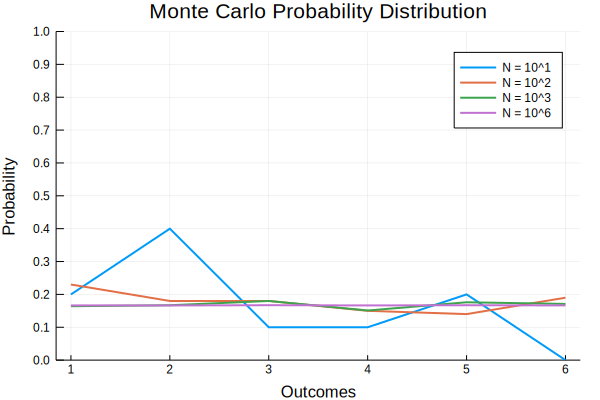

In [34]:
using Plots

faces = 1:6 #set the faces of a dice to be equal to a discrete range from 1 to 6

function monteCarloDiceEstimate(N) #define a function for the Monte Carlo estimated probability of a die face; the parameter N defines the number of dice rolls per estimate
    faceProbabilities = [] #initialise an array that will store the estimated probabilities of each die face
    
    for face in faces #initialise a for loop that will go through through each die face     
        diceRolls = rand(faces, N) #simulate N number of dice rolls and store every result in the array diceRolls
        faceRolls = count(i->(i==face), diceRolls) #count the number of values in diceRolls that are equal to the current die face value 
        faceProbability = faceRolls/N #obtain the probability for the current die face by dividing the number of rolls that matched the current die face by the total number of rolls 
        push!(faceProbabilities, faceProbability) #store the probability for the current die face in the faceProbabilities array (indexes match die face values as earlier calculations are pushed into earlier indexes)
    end #end of for loop
    
    faceProbabilities #return the faceProbabilities array as output, it now contains the estimated probability of each die face occurring based on an N number of dice rolls
end #end of function

x = faces #set the x axis to be the faces of a die
y = [monteCarloDiceEstimate(10^1)] #set the y axis values to be equal to each face's Monte Carlo estimated probability with 10^1 experiments per estimate

p = plot( #assign a plot object to the variable p using the following attributes
    x, #x series
    y, #y series
    st = :line, #series type
    title = "Monte Carlo Probability Distribution", #plot title
    label = "N = 10^1", #legend label
    xlabel = "Outcomes", #x axis label
    ylabel = "Probability", #y axis label
    ylims = (0,1), #y axis limits
    yticks = 0:0.1:1, #y axis tick range
    lw = 2 #line width
)

y =  monteCarloDiceEstimate(10^2) #set the y axis values to be equal to each face's Monte Carlo estimated probability with 10^2 experiments per estimate

plot!( #modify a given plot using the following attributes
    p, #plot object being modified
    x, #x series
    y, #modified y series to be added to given plot object
    label = "N = 10^2", #legend label for y series to be added
    lw = 2 #line width
)

y = monteCarloDiceEstimate(10^3) #set the y axis values to be equal to each face's Monte Carlo estimated probability with 10^3 experiments per estimate

plot!( #modify a given plot using the following attributes
    p, #plot object being modified
    x, #x series
    y, #modified y series to be added to given plot object
    label = "N = 10^3", #legend label for y series to be added
    lw = 2 #line width
)

y = monteCarloDiceEstimate(10^6) #set the y axis values to be equal to each face's Monte Carlo estimated probability with 10^6 experiments per estimate

plot!( #modify a given plot using the following attributes
    p, #plot object being modified
    x, #x series
    y, #modified y series to be added to given plot object
    label = "N = 10^6", #legend label for y series to be added
    lw = 2 #line width
)


### Bernoulli Trials

- Bernoulli trial (or binomial trial): a random experiment with exactly two possible outcomes, "success" and "failure", in which the probability of success is the same every time the experiment is conducted.
- Bernoulli distribution: the discrete probability distribution of a random variable which takes the values 1 or 0 with probabilities p or q = 1 - p.


- A typical example of a Bernoulli distributed random variable is the result of a coin toss, which randomly selects a sample of size 1 from a sample space of {H,T} (or {0,1}).


- Again, we can simulate a coin toss using the base rand() function.

In [11]:
print(rand(["H","T"]))

"T"

- Binomial distribution: the discrete probability distribution of the number of successes in a sequence of n independent Bernoulli experiments, each with its own boolean-valued outcome of 1 or 0 with probabilities p or q = 1 - p.


- The probability of a given number of successes in a series of n Bernoulli experiments with probabilities p or q = 1 - p, k ~ B(n, p), is modelled using a binomial distribution function.

\begin{equation}
f(k)=P(k)=\begin{pmatrix}n\\ k \end{pmatrix} \cdot p^k \cdot(1-p)^{n-k}=\frac{n!}{k!(n-k)!} \cdot p^k \cdot (1-p)^{n-k}
\end{equation}


- We can plot the binomial probability distribution and  binomial cumulative distribution of a series of coin toss experiments using the Binomial(), pdf(), and cdf() functions from the Distributions package.

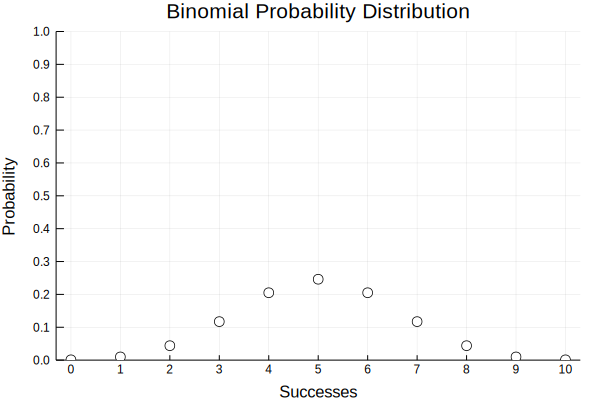

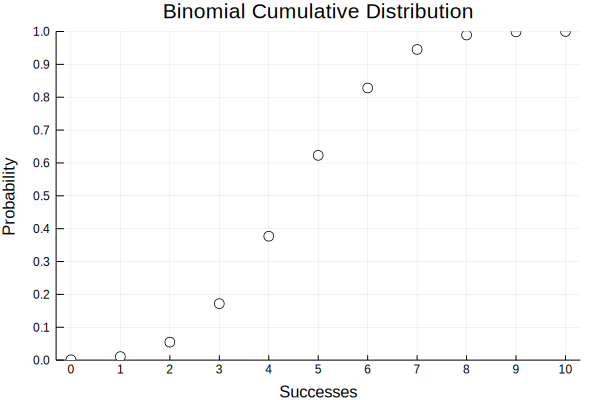

In [1]:
using Distributions
using Plots

n = 10 #define the number of experiments n
p = 0.5 #define the success probability of each experiment p

d = Binomial(n, p) #initialise and define the binomial object using variables n and p

x = 0:n #the x axis is defined to be the entire possible range of the number of successful experiments 
y = pdf(d, 0:n) #probability distribution function applied to the binomial object returns an array of probabilities which is set to be the y axis

p1 = plot( #assign a plot object to the variable p using the following attributes
    x, #x series
    y, #y series
    st = :scatter, #series type
    title = "Binomial Probability Distribution", #plot title
    label = "", #legend label
    xlabel = "Successes", #x axis label
    xticks = 0:1:10, #x axis tick range
    ylabel = "Probability", #y axis label
    ylims = (0,1), #y axis limits
    yticks = 0:0.1:1, #y axis tick range
    ms = 5, #marker size
    mc = :white #marker color
)

y = cdf(d, 0:n) #cumulative distribution function applied to the binomial object returns an array of probabilities which is set to be the y axis

p2 = plot( #assign a plot object to the variable p using the following attributes
    x, #x series
    y, #y series
    st = :scatter, #series type
    title = "Binomial Cumulative Distribution", #plot title
    label = "", #legend label
    xlabel = "Successes", #x axis label
    xticks = 0:1:10, #x axis tick range
    ylabel = "Probability", #y axis label
    ylims = (0,1), #y axis limits
    yticks = 0:0.1:1, #y axis tick range
    ms = 5, #marker size
    mc = :white #marker color
)

display(p1)
display(p2)

### Expected Value, Mean and Variance

- The expected value of a random variable is the long-run average value of its outcomes when the number of repeated trials is large.
- For a discrete random variable, the expected value is computed as a probability-weighted average of its possible outcomes.

\begin{equation}
E(Y) = y_1 p_1 + y_2 p_2 + \cdots + y_k p_k = \sum_{i=1}^k y_i p_i
\end{equation}

- For a dice roll, a probability-weighted average of all possible outcomes results in a value of 3.5.
- The same result could be obtained by simply taking the mean of all possible outcomes, as the probabilities of the outcomes of a dice roll are all equal to the inverse of the total number of outcomes, 1/6.


- This is simulated below using the base length() and sum() functions

In [44]:
function expectedValue(yArray, pArray)
    ypArray = []
    
    for i in 1:length(yArray)
        push!(ypArray, yArray[i] * pArray[i])
    end
    
    sum(ypArray)    
end
    
y = 1:6
p = [1/6 for _ in y]

print("Using the probability-weighted average method: " * string(expectedValue(y, p)))
print("\n")
print("Using the mean method: " * string(mean(y)))        

Using the probability-weighted average method: 3.5
Using the mean method: 3.5